# Business Case: Delhivery - Feature Engineering

# Business Statement:

The company wants to understand and process the data coming out of data engineering pipelines.Clean, sanitize and manipulate data to get useful features out of raw fields.Make sense out of the raw data and help the data science team to build forecasting models on it.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

## Import data

In [4]:
data=pd.read_csv('delhivery_data.csv')
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# Basic Data Exploration

In [5]:
data.shape

(144867, 24)

* Data have 24 columns and 144867 rows

In [6]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [8]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [10]:
for col in data.columns:
    print(col,':',data[col].unique())

data : ['training' 'test']
trip_creation_time : ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']
route_schedule_uuid : ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e08be79-8a4c-4a91-a514-5350403c0e31'
 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c150996']
route_type : ['Carting' 'FTL']
trip_uuid : ['trip-153741093647649320' 'trip-153768492602129387'
 'trip-153693976643699843' ... 'trip-153761584139918815'
 'trip-153718412883843340' 'trip-153746066843555182']
source_center : ['IND388121AAA' 'IND388620AAB' 'IND421302AAG' ... 'IND361335AAA'
 'IND562132AAC' 'IND639104AAB']
source_name : ['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
 'Bhiwandi_Mankol

## Data information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Separate data in to Categorical Data And Numerical Data

### Categorical Data

In [12]:
data.describe(include=['object'])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [13]:
cat_columns=data.dtypes=='object'
category=list(cat_columns[cat_columns].index)
num_columns=data.dtypes!='object'
numerical=list(num_columns[num_columns].index)

In [14]:
category_data=data[category]
category_data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55
...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19


In [15]:
for col in category_data.columns:
    print(col,':',category_data[col].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
cutoff_timestamp : 93180


### Numerical Data

In [16]:
numerical_data=data[numerical]
numerical_data

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,86.0,True,9,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,86.0,True,18,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,86.0,True,27,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,86.0,True,36,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,86.0,False,39,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
144862,427.0,True,45,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,427.0,True,54,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,427.0,True,63,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,427.0,True,72,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [17]:
for col in numerical_data.columns:
    print(col,':',numerical_data[col].nunique())

start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


## Convert object type To DateTime

In [18]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])
data['cutoff_timestamp']=pd.to_datetime(data['cutoff_timestamp'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [20]:
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19.000000,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


## No of uniquness in each columns

In [21]:
for col in data.columns:
    print(col,':',data[col].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


# Missing Values & Data Cleaning

In [22]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

* In this whole data  only source_name and destination_name have missing values.
  Destination_name have 261 missing value and Source_name have 293 missing value

In [23]:
# Replace missing value using mode/ freequency imputer

In [24]:
def missing_to_df(data):
    total_missing_df = data.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [25]:

missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165


* From source_name 0.20% data values are missing 
* From destination_name 0.18 % data values are missing 

In [26]:
# categorical 
cat_missing = ['source_name', 'destination_name']
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [27]:
missing_to_df(data)

,Total,Percent
data,0,0.0
trip_creation_time,0,0.0
segment_osrm_distance,0,0.0
segment_osrm_time,0,0.0
segment_actual_time,0,0.0
factor,0,0.0
osrm_distance,0,0.0
osrm_time,0,0.0
actual_time,0,0.0
actual_distance_to_destination,0,0.0


# Merging the rows 

In [28]:
dg=data

In [29]:
dg_merge=dg.groupby(['trip_uuid','source_center','destination_center']).agg({'data':'first',
                                                                             'trip_creation_time':'first',
                                                                            'route_schedule_uuid':'first',
                                                                             'route_type':'first',
                                                                             'source_name':'first',
                                                                             'destination_name':'last',
                                                                             'od_start_time':'first',
                                                                             'od_end_time':'last',
                                                                             'start_scan_to_end_scan':'max',
                                                                             'actual_distance_to_destination':'max',
                                                                             'actual_time':'max',
                                                                             'osrm_time':'max',
                                                                             'osrm_distance':'max',
                                                                             'segment_actual_time':'sum',
                                                                             'segment_osrm_time':'sum',
                                                                             'segment_osrm_distance':'sum'}).reset_index()
dg_merge

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [30]:
dg=dg_merge.groupby('trip_uuid').agg({'data':'first',
                                      'trip_creation_time':'first',
                                       'route_schedule_uuid':'first',
                                      'route_type':'first','source_center':'first',
                                      'source_name':'first',
                                      'destination_center':'last',
                                      'destination_name':'last',
                                      'od_start_time':'first',
                                      'od_end_time':'last',
                                      'start_scan_to_end_scan':'sum',
                                      'actual_distance_to_destination':'sum',
                                      'actual_time':'sum',
                                      'osrm_time':'sum',
                                      'osrm_distance':'sum',
                                      'segment_actual_time':'sum',
                                      'segment_osrm_time':'sum',
                                      'segment_osrm_distance':'sum'}).reset_index()
dg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324


# 2. Building some features to prepare the data for actual analysis. 

In [31]:
dg[['destination','dest_state']]=dg['destination_name'].str.split('(',1,expand=True)
dg['dest_state']=dg['dest_state'].str.rstrip(')')
dg[['dest_City','dest_place','dest_code']]=dg['destination'].str.split('_',2,expand=True)
dg[['source','source_state']]=dg['source_name'].str.split('(',1,expand=True)
dg['source_state']=dg['source_state'].str.rstrip(')')
dg[['source_City','source_place','source_code']]=dg['source'].str.split('_',2,expand=True)
dg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,destination,dest_state,dest_City,dest_place,dest_code,source,source_state,source_City,source_place,source_code
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Mumbai_MiraRd_IP,Maharashtra,Mumbai,MiraRd,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP,D,Bellary_Dc,Karnataka,Bellary,Dc,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Faridabad_Blbgarh_DC,Haryana,Faridabad,Blbgarh,DC,FBD_Balabhgarh_DPC,Haryana,FBD,Balabhgarh,DPC
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Tirchchndr_Shnmgprm_D,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [32]:
dg['trip_creation_year'] =dg['trip_creation_time'].dt.year
dg['trip_creation_month'] =dg['trip_creation_time'].dt.month_name()
dg['trip_creation_day'] =dg['trip_creation_time'].dt.day
dg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,dest_place,dest_code,source,source_state,source_City,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Central,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,ChikaDPP,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Bilaspur,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,2018,September,12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,MiraRd,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None,2018,September,12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,WrdN1DPP,D,Bellary_Dc,Karnataka,Bellary,Dc,None,2018,September,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Mehmdpur,H,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H,2018,October,3
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Blbgarh,DC,FBD_Balabhgarh_DPC,Haryana,FBD,Balabhgarh,DPC,2018,October,3
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,GovndNgr,DC,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Shnmgprm,D,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,October,3


# Data Visualisation

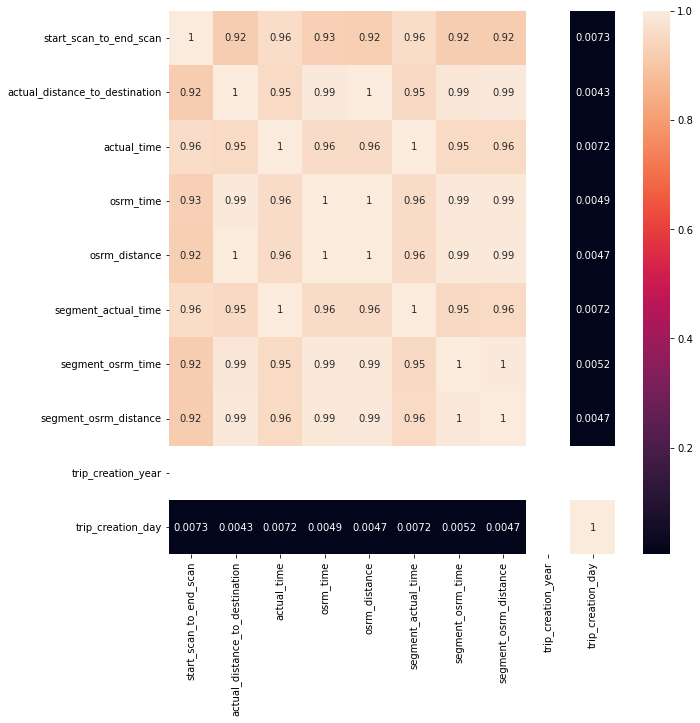

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(dg.corr(),annot=True)
plt.show()

## Most prefered route type for delivery

[]

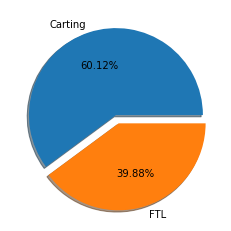

In [34]:
plt.pie(data=dg,x=dg['route_type'].value_counts(),shadow=True,labels=['Carting','FTL'],explode=(0,0.1),autopct='%0.2f%%')
plt.plot()

* Most of them using carting shipments rout type  .
* FTL:39.88%
* Carting:60.12%

## Trip Creation Day

[]

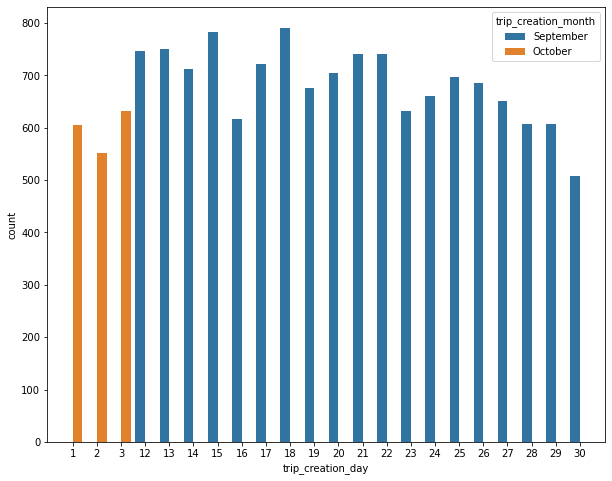

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x=dg['trip_creation_day'],hue=dg['trip_creation_month'])
plt.plot()

* majority of trip creation occured in 9 th mointh. 
* From 12th  day to end of month there have trip in septomber
* Data also give information about 3 day trip creation in october  

# Actual distance to destination v/s city

[]

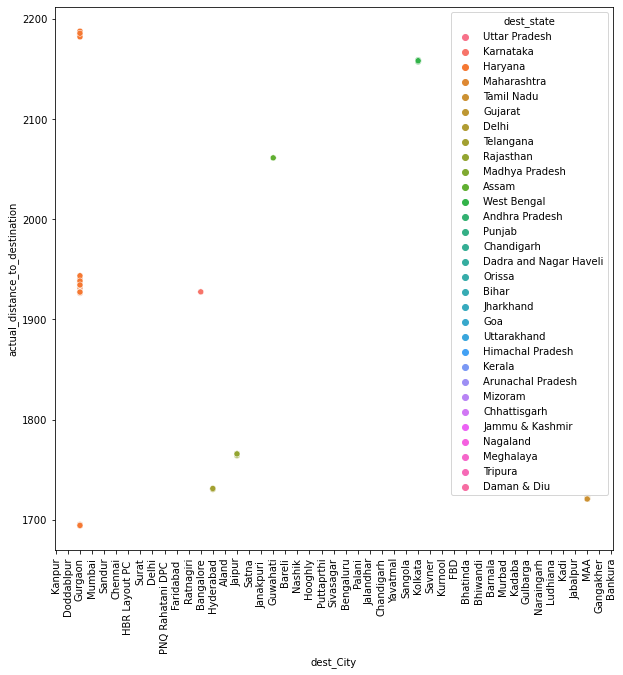

In [36]:
y=dg['actual_distance_to_destination'].sort_values(ascending=False).head(100).to_frame()
y
plt.figure(figsize=(10,10))
sns.scatterplot(x=dg['dest_City'],y=y['actual_distance_to_destination'],hue=dg['dest_state'])
plt.xticks(rotation=90)
plt.plot()

* from this information  we can say that gurgaon in hariyana is the city which  take more distance  to reach destination compaired other cities in whole states

# Indian states with source and destination delivery count

## Destination state with  delivery count

In [37]:
x=dg.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
x

,dest_state,trip_uuid
0,Maharashtra,2561
1,Karnataka,2294
2,Haryana,1670
3,Tamil Nadu,1084
4,Uttar Pradesh,811
5,Telangana,784
6,Gujarat,734
7,West Bengal,697
8,Delhi,652
9,Punjab,617


<AxesSubplot:xlabel='dest_state'>

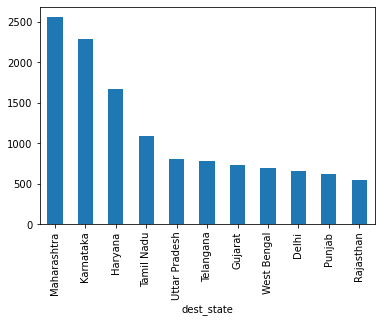

In [38]:
dg.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')


* More deliveries done in Maharashtra state :2561
* After that karnataka : 2294
* Top 5 Indian states with most product delivery destinations are :
    * Maharashtra
    * Karnataka
    * Haryana
    * Tamil Nadu and
    * Utter pradesh

# Source state with delivery count

In [39]:
x=dg.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
x

,source_state,trip_uuid
0,Maharashtra,2714
1,Karnataka,2143
2,Haryana,1854
3,Tamil Nadu,1039
4,Telangana,781
5,Uttar Pradesh,762
6,Gujarat,750
7,Delhi,728
8,West Bengal,665
9,Punjab,536


<AxesSubplot:xlabel='source_state'>

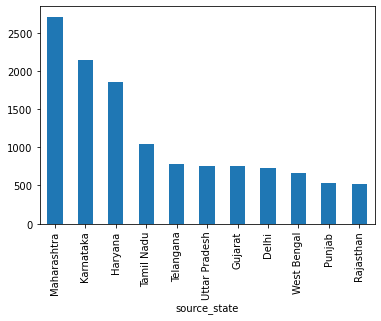

In [40]:
dg.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')


* The sourcestate Maharashtra have delivery around 2714
* After that karnataka : 2143
* Top 5 Indian states with most product delivery sources are :
    * Maharashtra
    * Karnataka
    * Haryana
    * Tamil Nadu and
    * Telangana

# Analaysing through destination places in each state Which place have more delivery ?

In [41]:
y=dg.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
y

,dest_place,dest_state,trip_uuid
0,Bilaspur,Haryana,891
1,Nelmngla,Karnataka,548
2,Mankoli,Maharashtra,434
3,Bomsndra,Karnataka,346
4,Shamshbd,Telangana,339
5,Kundli,Haryana,320
6,Mehmdpur,Punjab,274
7,KGAirprt,Karnataka,272
8,Tathawde,Maharashtra,258
9,Dankuni,West Bengal,235


<AxesSubplot:xlabel='dest_place,dest_state'>

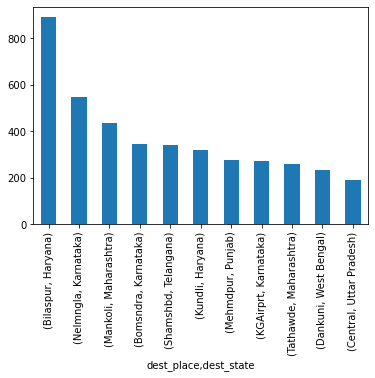

In [42]:
dg.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

<AxesSubplot:xlabel='dest_place'>

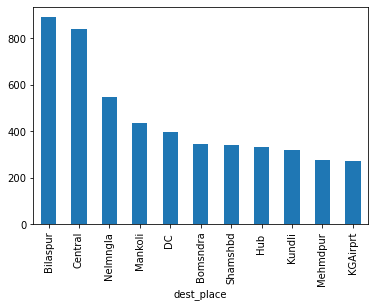

In [43]:
dg.groupby('dest_place')['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

* From this we can say that Bilaspur in Haryana owned the place of most delivered place among whole state
* after that Nelmngla par of Karnataka owned second 

# Analaysing through source places in each state Which place have more delivery

<AxesSubplot:xlabel='source_place,source_state'>

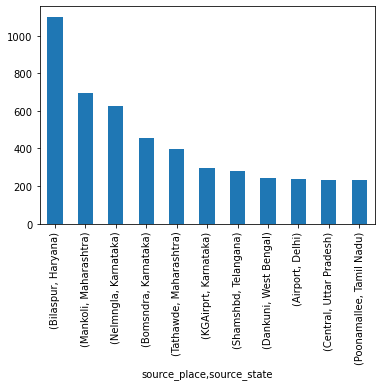

In [44]:
dg.groupby(['source_place','source_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

* From this we can say that Bilaspur in Haryana owned the place of most delivered source place among whole state
* after that mankoli par of maharshtra owned second 
* The states with most destination places are :
    * Bilaspur :Haryana
    * Mankoli :Maharashtra
    * Nelmngla :karnataka
    * BOmsndra : karnataka
    * Tathawde :Maharashtra

# Analaysing through cities in each state Which city have more delivery ?


In [45]:
h=dg.groupby(['dest_City','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
h

,dest_City,dest_state,trip_uuid
0,Bengaluru,Karnataka,1088
1,Mumbai,Maharashtra,966
2,Gurgaon,Haryana,904
3,Bangalore,Karnataka,551
4,Delhi,Delhi,549
5,Hyderabad,Telangana,499
6,Bhiwandi,Maharashtra,434
7,Chennai,Tamil Nadu,410
8,Sonipat,Haryana,322
9,Pune,Maharashtra,313


<AxesSubplot:xlabel='dest_City,dest_state'>

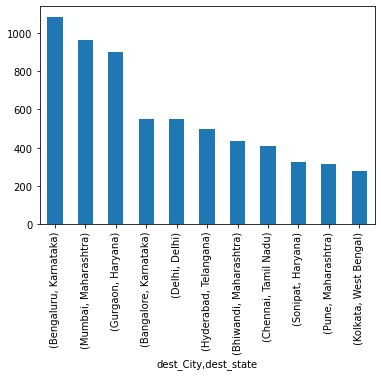

In [46]:
dg.groupby(['dest_City','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

* By analysing through each city Bengaluru in Karnataka have more delivery compaired to other cities
* The cities with most destination centres are :
    * Bangalore
    * Mumbai
    * Gurgaon
    * Bangalore and
    * Delhi

In [47]:
dg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,dest_place,dest_code,source,source_state,source_City,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Central,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,2018,September,12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,ChikaDPP,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,2018,September,12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Bilaspur,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,2018,September,12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,MiraRd,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None,2018,September,12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,WrdN1DPP,D,Bellary_Dc,Karnataka,Bellary,Dc,None,2018,September,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Mehmdpur,H,Chandigarh_Mehmdpur_H,Punjab,Chandigarh,Mehmdpur,H,2018,October,3
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Blbgarh,DC,FBD_Balabhgarh_DPC,Haryana,FBD,Balabhgarh,DPC,2018,October,3
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,GovndNgr,DC,Kanpur_GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,October,3
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Shnmgprm,D,Tirunelveli_VdkkuSrt_I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,October,3


# Which month proceed more trip?

<AxesSubplot:xlabel='trip_creation_month', ylabel='count'>

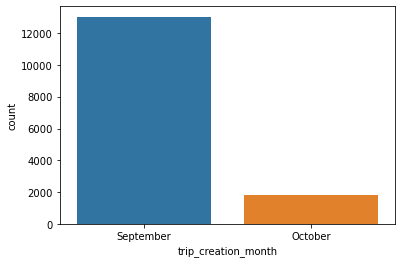

In [48]:
sns.countplot(x='trip_creation_month',data=dg)

* majority of trip creation occured in 9 th mointh
* Data also give few information about trip creation in october  

# Which route type use more time to reach destination?

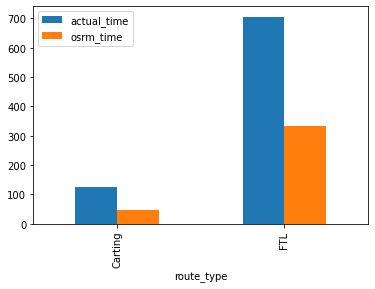

In [49]:
dg.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.show()

* By this we can say that  Full Truck Load, FTL shipments  Full Truck Load takes more time to deliver product and time taken to actual and osrm  higher than that of rout type 

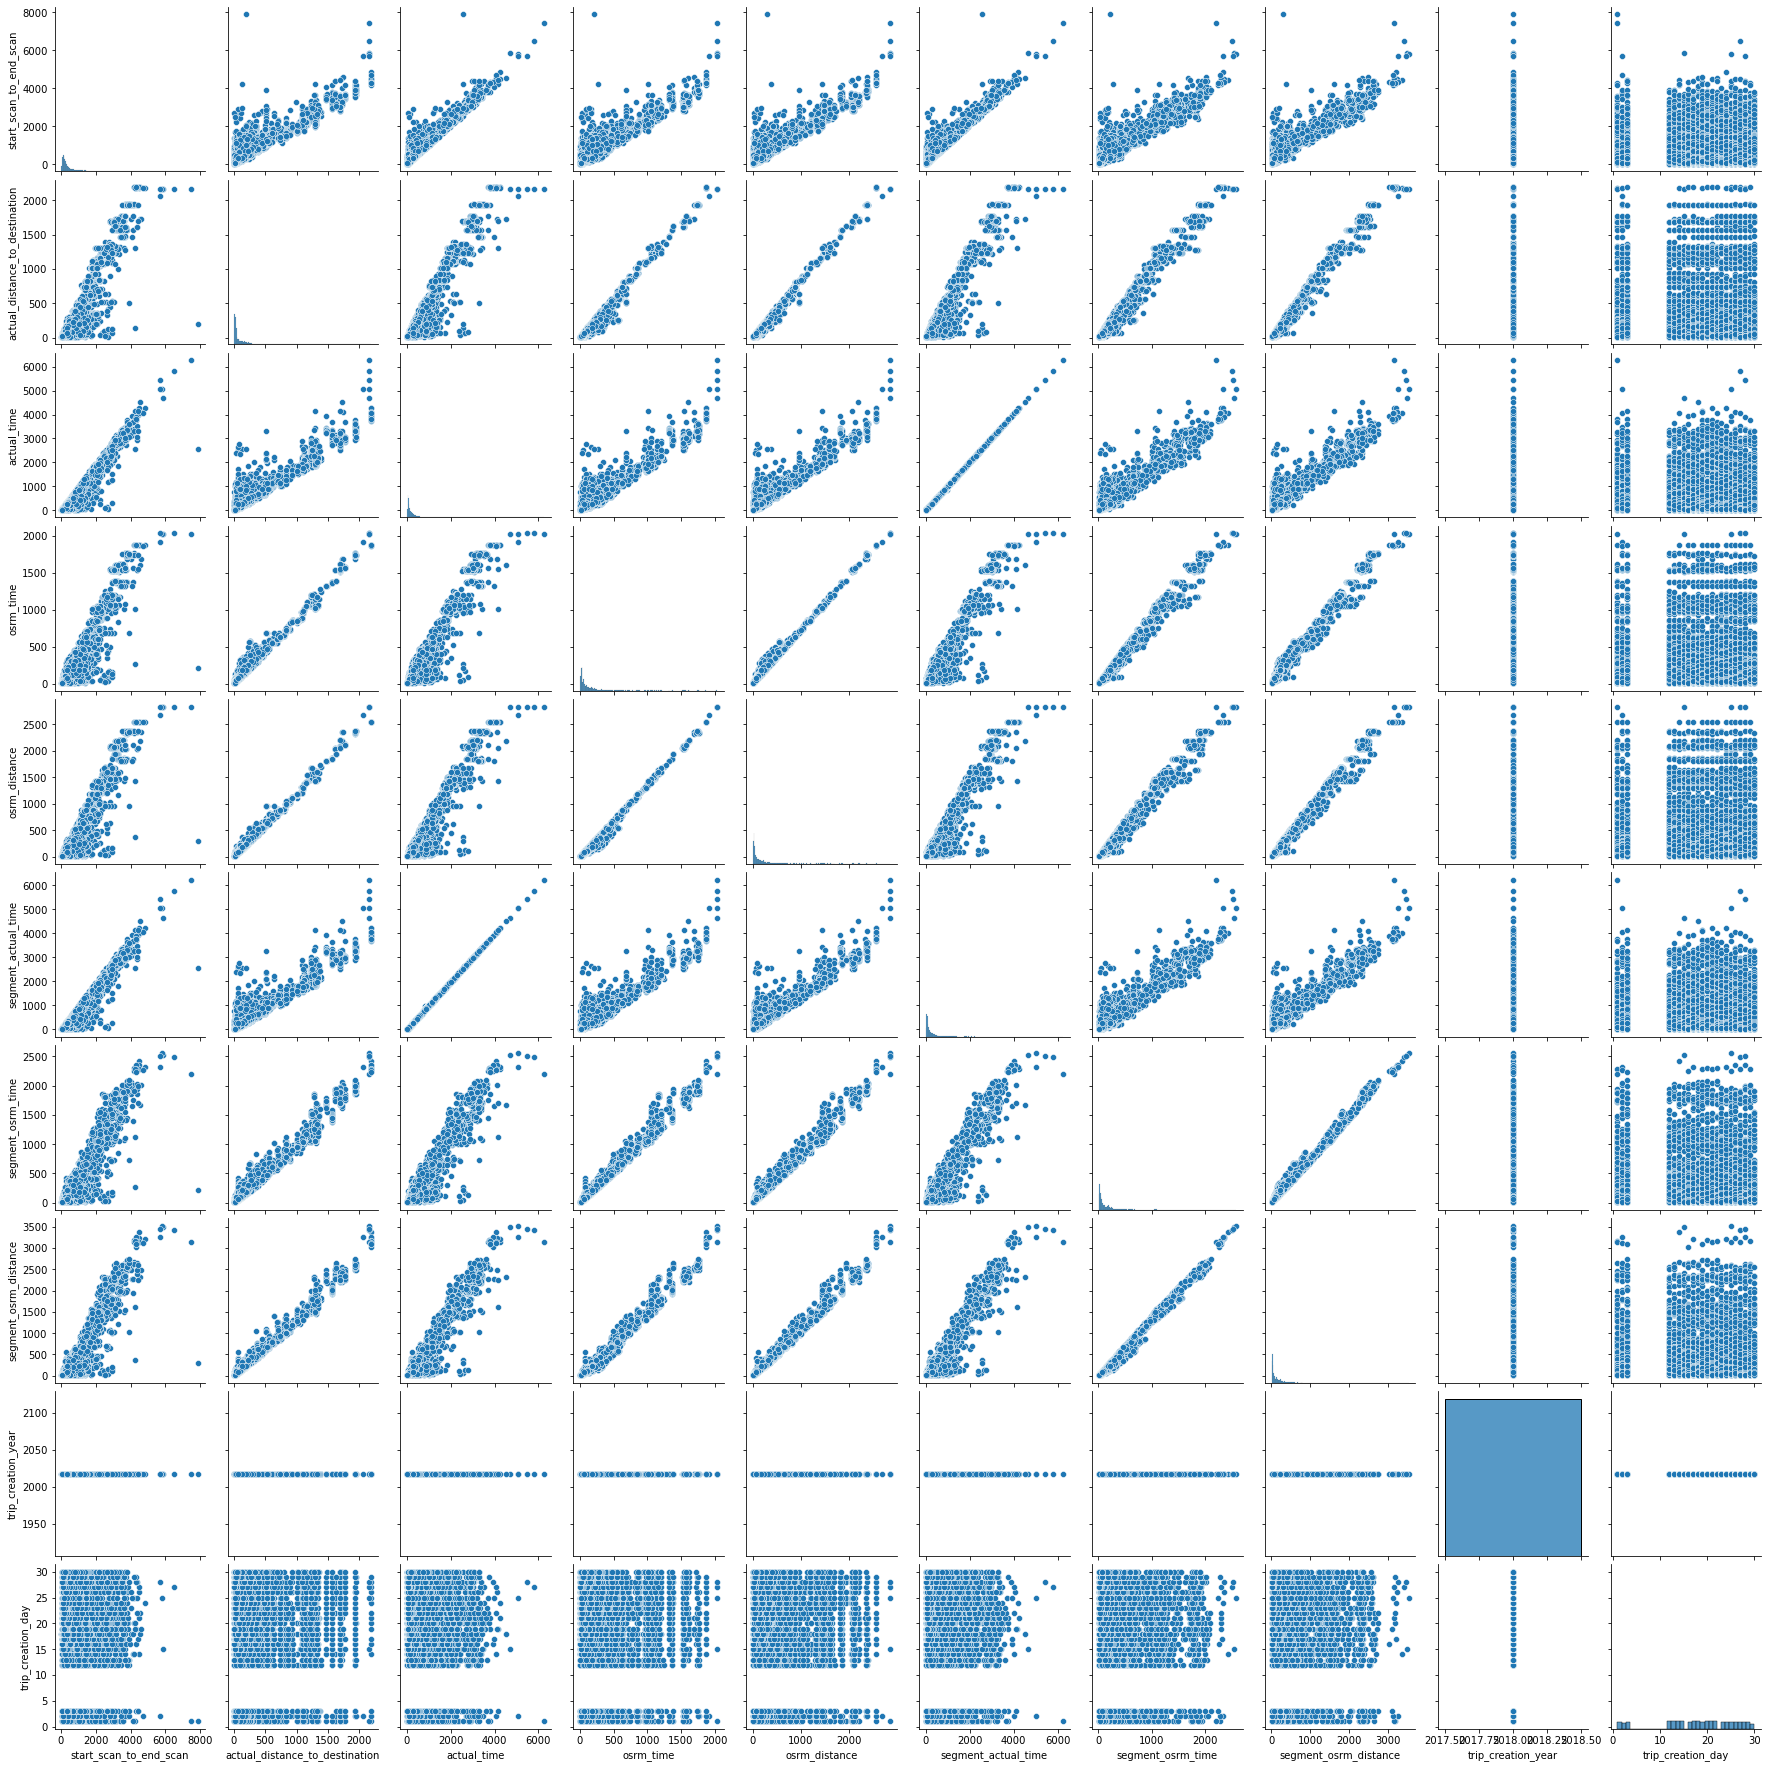

In [50]:
sns.pairplot(dg)

# Which state has more source center

In [ ]:
dg.groupby('source_state')['source_center'].nunique().sort_values(ascending=False).plot(kind='bar')

* By this we can say maharashtra have  more source center compaired  to other states
* After thar uttar pradesh ,thamilnadu owned 2 nd and 3rd place of state have more centers.
* Top 5 Indian states with most delivery source centres are :
   * Maharashtra
   * Uttar Pradesh
   * Tamil Nadu
   * West Bengal and
   * Karnataka

# Which state has more destination center

In [ ]:
dg.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False).plot(kind='bar')

* By this we can say maharashtra have  more destination center compaired  to other states
* After thar uttar pradesh ,Karnataka owned 2nd and 3rd place of state have more centers.
* Top 5 Indian states with most delivery destination centres are :
   * Maharashtra
   * Uttar Pradesh
   * Haryana
   * Karnataka and
   * Tamil Nadu


In [ ]:
dg['weekday'] = dg['trip_creation_time'].dt.day_name()
dg

# Weekday with most delivery of the product

In [ ]:
x=dg['weekday'].value_counts().to_frame('count').reset_index()
x

In [ ]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x, x=x['count'], colors=palette_color, labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()

* Compaired to other days mostly deliveries done in wednesday
* wednesday :18.49% of trips are done 
* After that  thursday: 14.38%

# Actual time v/s Time which computes the shortest path 

In [ ]:
x1=dg.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

* From the above observation we can say that
     * In Dadra and Nagar Haveli the actual and osrm time are almost equal
     * There is not that much variation in Tamil Nadu also
     * In Mizoram we can see there is high variation in actual and osrm time 
     * Similarly  in case of Haryana and Himachalpradesh also have high    variation

In [ ]:
x1=dg.groupby('source_state').agg({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
x1

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

* From the above observation we can say that
     * In Dadra and Nagar Havel,Delhi,Tamil nadu  actual and osrm distance   are almost equal
     * There is not that much variation in Bihar,Arunachal Pradesh also
     * In Mizoram we can see there is high variation in actual and osrm distance
     * Similarly in case of Assam Haryana,and Goa also have high variation

In [ ]:
df=data

# In-depth analysis and feature engineering

### Calculate the time taken between od_start_time and od_end_time and keep it as a feature.Drop the original columns, if required

In [ ]:
dg

In [ ]:
#Creating a new column of difference in od_end_time and od_start_time
# After creat new column drop previous columns

In [ ]:
dg['total_min_diff']=(dg['od_end_time']-dg['od_start_time'])/pd.Timedelta(minutes=1)
dg
#df.drop(columns=['od_end_time','od_start_time'],axis=1,inplace=True)

## 3.2 Compare the difference between total_min_diff and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [ ]:
# compare total_min_diff and start_scan_to_end_scan 

In [ ]:
dg[['start_scan_to_end_scan','total_min_diff']]

In [ ]:
#Hypothesis Test
#Ho= mean (start_scan_to_end_scan )==mean(total_min_diff)
#Ha=mean (start_scan_to_end_scan )!=mean(total_min_diff)

In [ ]:
#Checking normal distribution of start_scan_to_end_scan
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.distplot(dg['start_scan_to_end_scan'])
plt.plot()
plt.subplot(122)
sns.distplot(np.log(dg['start_scan_to_end_scan']))
plt.plot()

* Here we can see that first figure show that the data have  more outlier so it is lognormal  distibution 
* After taking log of data for converting to normal distribution,but it doesn't obey normal distibution .So it make the necessity of bootstraping

* By Hypothesis we need to check that the mean value of observed column 'norm_total_min_diff' inside the region of 
  'norm_start_scan_to_end_scan' or not. By this we can accept or reject hypothesis statement Ho and Ha 

In [ ]:
x=dg[['start_scan_to_end_scan','total_min_diff']]
x

In [ ]:
#
observed_mean_difference=np.mean(x['start_scan_to_end_scan'])-np.mean(x['total_min_diff'])
observed_mean_difference

In [ ]:
# concate two columns
p=np.concatenate((x['start_scan_to_end_scan'],x['total_min_diff']))
p


In [ ]:
# make a list of mean of p
test_sample=[]
iteration=10000
for i in range(iteration):
    np.random.shuffle(p)
    new_p1=p[:144867]
    new_p2=p[144867:]
    mean_diff=np.mean(new_p1)-np.mean(new_p2)
    test_sample.append(mean_diff)

In [ ]:
len(p)/2

In [ ]:
test_sample

In [ ]:
sns.kdeplot(test_sample,fill=True)

In [ ]:
mean_test_sample=np.mean(test_sample)
mean_test_sample

In [ ]:
std_test_sample=np.std(test_sample)
std_test_sample

In [ ]:
#significant_level=0.05
#x1=z*std_test_sample+mean_test_sample

In [ ]:
from scipy.stats import norm
ucv=(norm.ppf(0.975))*std_test_sample+mean_test_sample
lcv=(norm.ppf(0.025))*std_test_sample+mean_test_sample
ucv

In [ ]:
print('Lower critical value :',lcv)
print('Upper critical value :',ucv)
print('observed mean difference :',observed_mean_difference)

* This analyse we can say that mean of observed_mean_difference inside  region of the expected
  mean_test_sample.
* It implies that mean of 'norm_start_scan_to_end_scan' equal to 'norm_start_scan_to_end_scan'.
  So accepting the null hypothesis

### 3.3 Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
dg.head(15)

In [ ]:
y=dg.groupby(['trip_uuid','source_center'])['actual_time'].max().to_frame('time').reset_index()
print(y)
y.groupby('trip_uuid')['time'].sum().to_frame('actual_time').reset_index()

In [ ]:
z=dg.groupby(['trip_uuid','source_center'])['osrm_time'].max().to_frame('osr_times').reset_index()
c=z[z['trip_uuid']=='trip-153671041653548748']
c

In [ ]:
z=dg.groupby(['trip_uuid','source_center'])['osrm_time'].max().to_frame('osr_times').reset_index()
z.groupby('trip_uuid')['osr_times'].sum().to_frame('actual_osr_time').reset_index()

In [ ]:
x=dg.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','osrm_time':'max'})
x=x.groupby('trip_uuid').agg({'actual_time':'sum','osrm_time':'sum'}).reset_index()
x.rename(columns={'actual_time':'actual_time_agg','osrm_time':'osrm_time_agg'},inplace=True)

In [ ]:
x

In [ ]:
# mean difference of obsevation

In [ ]:
mean_observed_diff=np.mean(x['actual_time_agg'])-np.mean(x['osrm_time_agg'])
mean_observed_diff

In [ ]:
# concate two columns

In [ ]:
p=np.concatenate((x['actual_time_agg'],x['osrm_time_agg']))
p

In [ ]:
# make a list of mean of p
test_sample=[]
iteration=10000
for i in range(iteration):
    np.random.shuffle(p)
    new_p1=p[:14817]
    new_p2=p[14817:]
    mean_diff=np.mean(new_p1)-np.mean(new_p2)
    test_sample.append(mean_diff)

In [ ]:
len(p)/2

In [ ]:
test_sample

In [ ]:
sns.kdeplot(test_sample,fill=True)

In [ ]:
mean_test_sample=np.mean(test_sample)
mean_test_sample

In [ ]:
std_test_sample=np.std(test_sample)
std_test_sample

In [ ]:
# calculate x values

In [ ]:
from scipy.stats import norm
ucv=(norm.ppf(0.975))*std_test_sample+mean_test_sample
lcv=(norm.ppf(0.025))*std_test_sample+mean_test_sample
ucv

In [ ]:
print('Lower critical value :',lcv)
print('Upper critical value :',ucv)
print('observed mean difference :',mean_observed_diff)

* This analyse we can say that mean of observed_mean_difference outside region of the expected
  mean_test_sample or we can it is in rejection region
* It implies that mean of 'actual_time_agg' equal to 'osrm_time_agg'.
  So rejecting the null hypothesis

# 3.4 	Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
dg

In [ ]:
y=dg.groupby(['trip_uuid','source_center'])['segment_actual_time'].max().to_frame('segment_time').reset_index()
print(y)
y.groupby('trip_uuid')['segment_time'].sum().to_frame('segmented_actual_time_agg').reset_index()

In [ ]:
w=dg.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','segment_actual_time':'sum'})
w=w.groupby('trip_uuid').agg({'actual_time':'sum','segment_actual_time':'sum'}).reset_index()
w.rename(columns={'actual_time':'actual_time_agg','segment_actual_time':'segment_actual_time_agg'},inplace=True)
w

In [ ]:
#mean_difference_observation

In [ ]:
mean_of_observation=np.mean(w['actual_time_agg'])-np.mean(w['segment_actual_time_agg'])
mean_of_observation

In [ ]:
# concate two observed columnss
s=np.concatenate((w['actual_time_agg'],w['segment_actual_time_agg']))
s

In [ ]:
test_sample1=[]
itr=10000
for i in range(itr):
    np.random.shuffle(s)
    new_s1=s[:14817]
    new_s2=s[14817:]
    mean_diff=np.mean(new_s1)-np.mean(new_s2)
    test_sample1.append(mean_diff)
    

In [ ]:
len(s)/2

In [ ]:
test_sample1

In [ ]:
sns.kdeplot(test_sample1,fill=True)

In [ ]:
# mean of test_sample1
mean_sample=np.mean(test_sample1)
mean_sample

In [ ]:
# std of test_sample
std_sample=np.std(test_sample1)
std_sample

In [ ]:
# calculate x values
# significant_value=0.05
from scipy.stats import norm
lcv=norm.ppf(0.025)*std_sample+mean_sample
ucv=norm.ppf(0.975)*std_sample+mean_sample
lcv

In [ ]:
print('Lower critical value :',lcv)
print('Upper critical value :',ucv)
print('observed mean difference :',mean_of_observation)

* This analyse we can say that mean of observed_mean_difference inside region of the expected
  mean_test_sample or we can it is in accepting region
* It implies that mean of 'actual_time_agg' equal to 'segment_actual_time_agg'.
  So accepting the null hypothesis

## 	3.5 Do hypothesis testing/ visual analysis between 1 (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
 dg

In [ ]:
w=dg.groupby(['trip_uuid','source_center']).agg({'osrm_distance':'max','segment_osrm_distance':'sum'})
w=w.groupby('trip_uuid').agg({'osrm_distance':'sum','segment_osrm_distance':'sum'}).reset_index()
w.rename(columns={'osrm_distance':'osrm_distance_agg','segment_osrm_distance':'segment_osrm_distance_agg'},inplace=True)
w

In [ ]:
mean_of_observation=np.mean(w['osrm_distance_agg'])-np.mean(w['segment_osrm_distance_agg'])
mean_of_observation

In [ ]:
# concatenate two columns
a=np.concatenate((w['osrm_distance_agg'],w['segment_osrm_distance_agg']))
a

In [ ]:
test_sample2=[]
itr=10000
for i in range(itr):
    np.random.shuffle(a)
    new_1=a[:14817]
    new_2=a[14817:]
    test_sample_mean=np.mean(new_1)-np.mean(new_2)
    test_sample2.append(test_sample_mean)

In [ ]:
len(a)/2

In [ ]:
sns.kdeplot(test_sample2,fill=True)

In [ ]:
mean_test_sample=np.mean(test_sample2)
mean_test_sample

In [ ]:
std_sample=np.std(test_sample2)
std_sample

In [ ]:
from scipy.stats import norm
lcv=norm.ppf(0.025)*std_sample+mean_test_sample
ucv=norm.ppf(0.975)*std_sample+mean_test_sample

In [ ]:
print('Lower critical value :',lcv)
print('Upper critical value :',ucv)
print('observed mean difference :',mean_of_observation)

* This analyse we can say that mean of observed_mean_difference outside region of the expected
  mean_test_sample or we can it is in rejection region
* It implies that mean of 'osrm_distance_agg' not equal to 'segment_osrm_distance_agg'.
  So rejecting the null hypothesis

## 3.6 Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [ ]:
dg

In [ ]:
w=dg.groupby(['trip_uuid','source_center']).agg({'osrm_time':'max','segment_osrm_time':'sum'})
w=w.groupby('trip_uuid').agg({'osrm_time':'sum','segment_osrm_time':'sum'}).reset_index()
w.rename(columns={'osrm_time':'osrm_time_agg','segment_osrm_time':'segment_osrm_time_agg'},inplace=True)
w

In [ ]:
mean_observed_diff=np.mean(w['osrm_time_agg'])-np.mean(w['segment_osrm_time_agg'])
mean_observed_diff

In [ ]:
# convert to a list
b=np.concatenate((w['osrm_time_agg'],w['segment_osrm_time_agg']))
b

In [ ]:
test_sample3=[]
itr=10000
for i in range(itr):
    np.random.shuffle(b)
    new1=b[:14817]
    new2=b[14817:]
    mean_test_sample=np.mean(new1)-np.mean(new2)
    test_sample3.append(mean_test_sample)

In [ ]:
len(b)/2

In [ ]:
sns.kdeplot(test_sample3,fill=True)
plt.plot()

In [ ]:
mean_test_sample=np.mean(test_sample3)
mean_test_sample

In [ ]:
std_test_sample=np.std(test_sample3)
std_test_sample

In [ ]:
# calculating lower and upper critical values
from scipy.stats import norm
lcv=norm.ppf(0.025)*std_test_sample+mean_test_sample
ucv=norm.ppf(0.975)*std_test_sample+mean_test_sample

In [ ]:
print('Lower critical value :',lcv)
print('Upper critical value :',ucv)
print('observed mean difference :',mean_observed_diff)

* This analyse we can say that mean of observed_mean_difference outside region of the expected
  mean_test_sample or we can it is in rejection region
* It implies that mean of 'osrm_time_agg' not equal to 'segment_osrm_time_agg'.
  So rejecting the null hypothesis

## Find outliers in the numerical variables (you might find outliers in almost all the variables),and check it using visual analysis

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f" {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


In [ ]:
#### Mean and median of attrs values shows large diffrance. So, we need to find outlayer values of purchace
ds=df.copy()
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in attrs:
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    ds=ds[~((ds[i]<lower)|(ds[i]>upper))]
ds

# One-hot encoding of categorical variables (like route_type)

In [ ]:
df_new = pd.get_dummies(ds, columns=["route_type"])
df_new

## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
df_new=df_new.drop(['data','trip_creation_time','source_name','is_cutoff','destination_name','cutoff_factor','factor','cutoff_timestamp'
             ,'segment_factor'],axis=1)

In [ ]:
df_new

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder
cols=['route_schedule_uuid','trip_uuid','source_center','destination_center']
te = TargetEncoder()
for col in cols:
    df_new[col] = te.fit_transform(df_new[col], df_new['segment_actual_time'])
#p(urben|Loan_Status=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
std_data=scaler.fit_transform(df_new)
std_data=pd.DataFrame(std_data,columns=df_new.columns)
std_data

In [ ]:
std_data

# Recommendations And Insights:

* For deliver the products 60.12% prioritize carting shipments rout type because FTL shipments Full Truck Load takes more time 
  to deliver product and time taken to actual and osrm higher than that of rout type
* Using carting shipments helps to reach destination sooner.
* Full truck load route type travels more distance to deliver products than that of the carting route type.so choosing cariting
  shipment is reduce time wasting
* Most of the products were delivered during wednesday followed by saturday and thursday. Least number of products were 
   delivered on sunday.This  indicate that it is preferable for customers to get productsdelivered during weekdays other 
    than sundays or mondays
* The observed value for actual time is significantly higher than that of the estimated time for product delivery.
* Time taken for delivery and total trip time differ the most in Mizoram, Himachal Pradesh and Uttarakhand
* States like Dadra & Nagar Haveli and Tamil Nadu, the difference between actual and estimatedtime is low.
* Also product delivery in places like Mizoram and Himachal Pradesh, actual and osrm time difference are very high. 
* Using routing machine give optimum results, then the difference can explained  the traffic conditions or distance through 
  major and minor roads
* Similarly the observed value for actual distance is always higher than that of the osrm distance for product delivery.Using
  An open-source routing engine which computes the shortest path between points,can explained  the traffic conditions
* Hypothesis test performed on different features indicated that observed values for estimated time and estimated distance vary 
  significantly compared to actual time and actual distance. This indicate the chance for error during the formation of optimum estimate values